<a href="https://colab.research.google.com/github/Jacob-h-v/AIPLectureExercises/blob/main/PredictingWIneQualityJHV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up the environment by loading in data and dependencies.

In [15]:
# Installing dependencies
!pip install ucimlrepo

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Since we can intuitively deduce that red and white whines have significantly differing sensory properties, let's keep them separate.

In [8]:
# Load in the data (code for getting data provided by UCI)

# Loading red and white wines data separately
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Load red wine data into a pandas dataframe
red_wine_df = pd.read_csv(red_wine_url, delimiter=";")

# Load white wine data into a pandas dataframe
white_wine_df = pd.read_csv(white_wine_url, delimiter=";")

# Concatenating the data in case a combined overview becomes useful
wine_df = pd.concat([red_wine_df, white_wine_df], axis=0).reset_index(drop=True)


Let's inspect the dataframes

In [9]:
# Inspecting the structure of each dataframe
#wine_df.head()
#red_wine_df.head()
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
#wine_df.info()
#red_wine_df.info()
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
#wine_df.describe()
#red_wine_df.describe()
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Let's also plot a histogram of each of the numerical attributes to get a visual representation of how they are distributed.

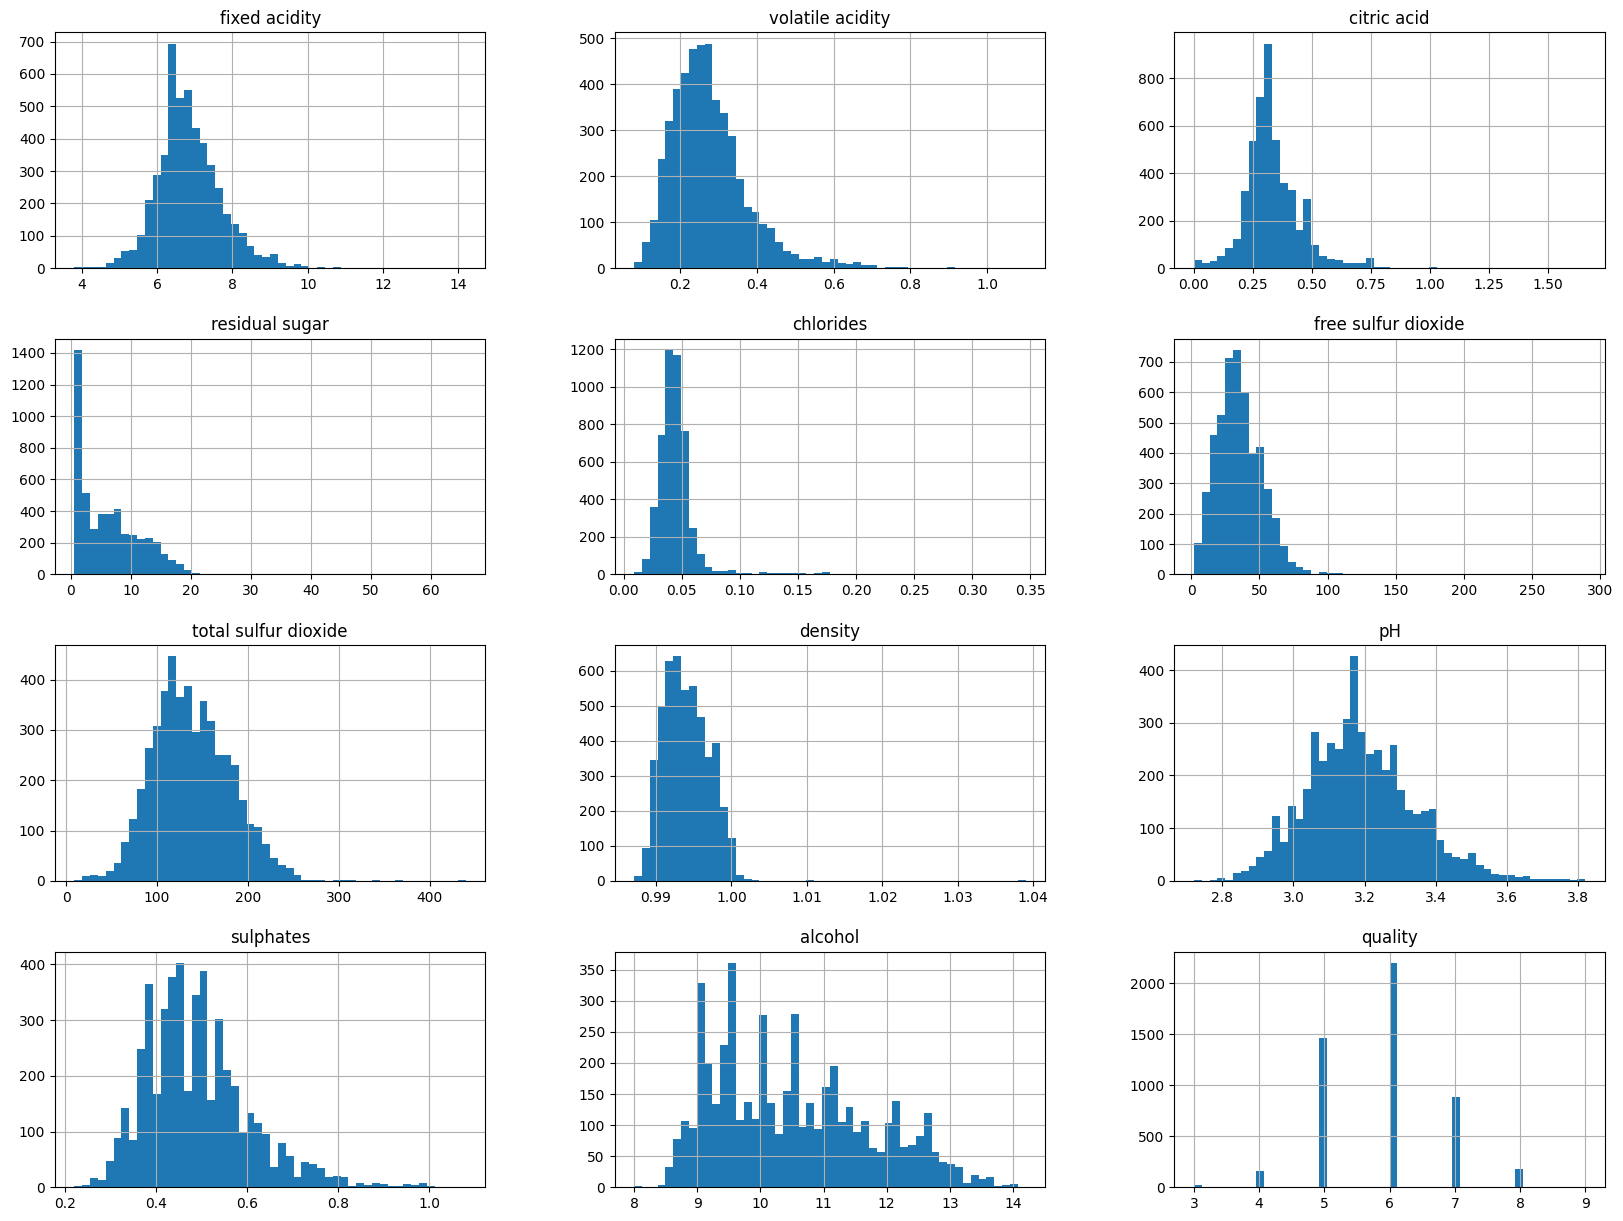

In [12]:
# Plotting histograms using matplotlib
#wine_df.hist(bins=50, figsize=(20,15))
#red_wine_df.hist(bins=50, figsize=(20,15))
white_wine_df.hist(bins=50, figsize=(20,15))
plt.show()

Taking a closer look at visualizing the target variables.

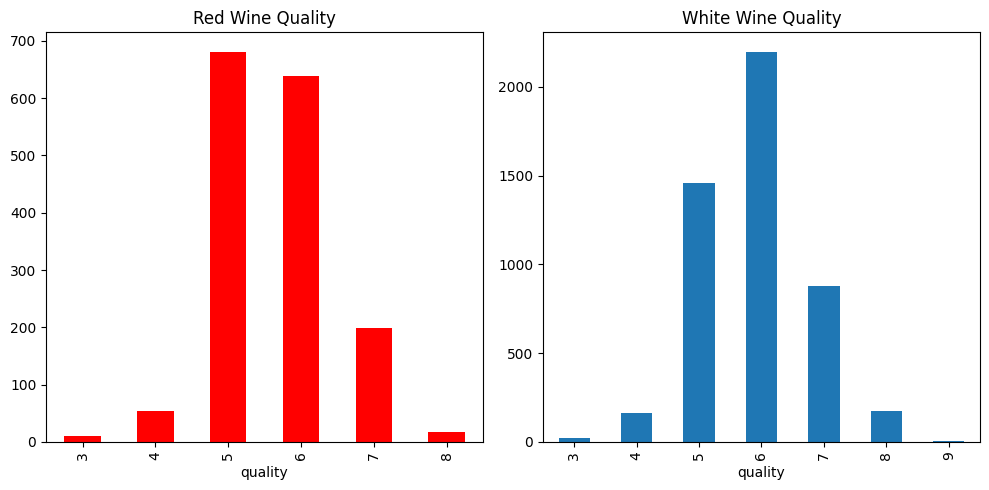

In [51]:
# Preparing a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # (1 row, two columns, ie. side by side)

# Creating the subplots
red_wine_df['quality'].value_counts().sort_index().plot(kind="bar", color="red", ax=ax1, title="Red Wine Quality")

white_wine_df['quality'].value_counts().sort_index().plot(kind="bar", ax=ax2, title="White Wine Quality")

# Display the combined figure
plt.tight_layout()
plt.show()

As seen in the plots generated by the above code, it seems like the target variables are both more or less normally distributed, but there seems to be no observations of wines with a quality of 10, or less than 3. However, there appears to be significantly more observations in the white whine data set.
Let's do a train-validation-test split next. Since we're not expecting updates to the data while developing the model, simply seeding the random number generator should be fine, whereas doing so with a data set that gets frequently updated would break the seeding when the data set is updated. In this case I will be doing a 70-20-10 split, since my dataset is not massive, and I would like to have a large enough validation set that I can comfortably tune hyperparameters without overfitting the model.

In [16]:
# Splitting the red and white wine sets into training set, validation set and test set
white_train_set, white_validation_set, white_test_set = np.split(white_wine_df.sample(frac=1, random_state=42), [int(.7*len(white_wine_df)), int(.9*len(white_wine_df))])

red_train_set, red_validation_set, red_test_set = np.split(red_wine_df.sample(frac=1, random_state=42), [int(.7*len(red_wine_df)), int(.9*len(red_wine_df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Now that the data is split into training, validation and test sets, it is time to perform standardization. The idea is, that standardizing all of the features so that their values range from -1 to 1, which prevents the model from interpreting higher numbers as more important, and may help the model converge faster.

In [ ]:
# Initializing scalers for the red and white wine data sets
red_scaler = StandardScaler()
white_scaler = StandardScaler()

# Standardizing the red wine data set, excluding the quality column, and fitting only the training set
red_training_features_scaled = red_scaler.fit_transform(red_train_set.drop("quality", axis=1))

# Using the fitted scaler to transform the red wine validation and test sets
red_validation_features_scaled = red_scaler.transform(red_validation_set.drop("quality", axis1))
red_test_features_scaled = red_Scaler.transform(red_test_set.drop("quality", axis=1))

# Standardizing the white wine data set, excluding the quality column, and fitting only the training set
white_training_features_scaled = white_scaler.fit_transform(white_train_set.drop("quality", axis=1))

# Using the fitted scaler to transform the red wine validation and test sets
white_validation_features_scaled = white_scaler.transform(white_validation_set.drop("quality", axis1))
white_test_features_scaled = white_Scaler.transform(white_test_set.drop("quality", axis=1))

# Keeping the target variable (quality) separately for each data set
red_training_labels = red_train_set["quality"]
red_validation_labels = red_validation_set["quality"]
red_test_labels = red_test_set["quality"]

white_training_labels = white_train_set["quality"]
white_validation_labels = white_validation_set["quality"]
white_test_labels = white_test_set["quality"]